In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import powerlaw as pl 
import scipy.stats as st

###  Question 1)

In [2]:
r = pd.read_csv('series_exam_24_05_2023.csv',names=[str(i) for i in range(120)])
n_colum = 42
r = r[str(n_colum)]
r

0      -0.017797
1      -0.026033
2       0.041089
3      -0.005811
4      -0.018576
          ...   
3995   -0.005403
3996   -0.007005
3997   -0.022172
3998    0.003961
3999   -0.000855
Name: 42, Length: 4000, dtype: float64

###  Question 2)

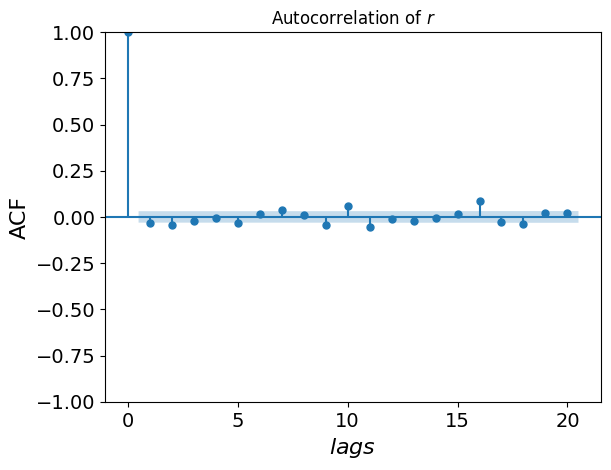

In [3]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.title("Autocorrelation of $r$")
plt.show()

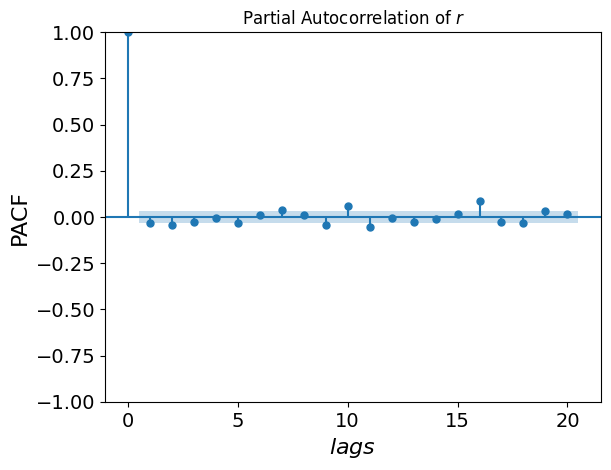

In [4]:
sm.graphics.tsa.plot_pacf(r, lags=20,method='ywm')
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.title("Partial Autocorrelation of $r$")
plt.show()

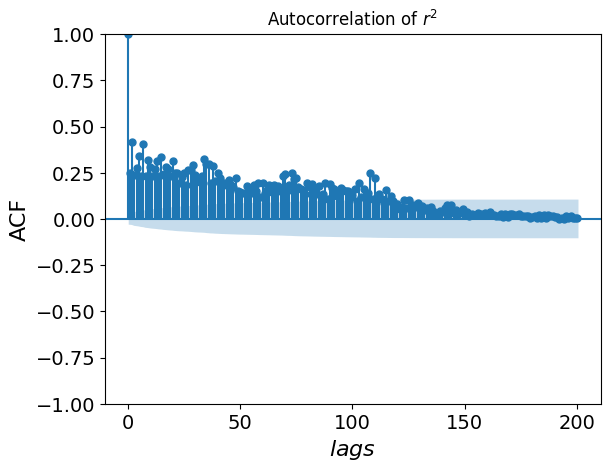

In [5]:
sm.graphics.tsa.plot_acf(r*r, lags=200)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.title("Autocorrelation of $r^2$")
plt.show()

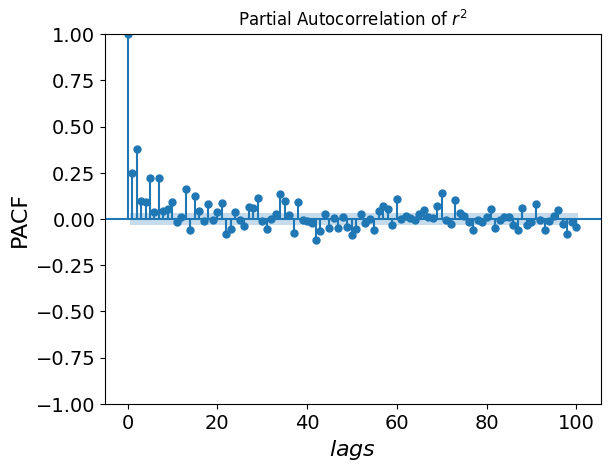

In [6]:
sm.graphics.tsa.plot_pacf(r*r, lags=100,method='ywm')
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('PACF',fontsize=16)
plt.tick_params(labelsize=14)
plt.title("Partial Autocorrelation of $r^2$")
plt.show()

Theses plot indicate that $r$ is moslty a random variable that does not depend too much of his past values. On the contrary $r^2$ strongly depends of his past values.

###  Question 3)

Because $r$ ACF and PACF decrease quickly it could be modeled by an ARMA. On the contrary $r^2$ ACF and PACF have low decrease so it will need a lot of parameters to be describe by an ARMA (few hundreds).

### Question 4)

$r$ ACF has significant value until second lag so moddeling it with pure MA($q$) we would take $ q = 2$. $r$ PACF has significant value until second lag so moddeling it with pure AR($p$) we would take $ p = 3$.

### Question 5)

In [7]:
# listing all model we want 
models = [(0,0),(1,0),(2,0),(3,0),(0,1),(0,2),(1,1),(1,2),(1,3),(1,4),(2,1),(2,2),(2,3),(2,4),(3,1),(3,2),(3,3),(3,4),(4,1),(4,2),(4,3),(4,4)]

In [8]:
#create a diction with the result of the fits
M = {}
for p,q in models:
    #fit an arma
    print(p,q)
    ft = ARIMA(r,order=(p,0,q)).fit()
    M[p,q] = ft

0 0
1 0
2 0
3 0
0 1
0 2
1 1
1 2
1 3
1 4


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 1
2 2
2 3
2 4


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 1
3 2


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


3 3
3 4


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 1
4 2


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4 3
4 4


c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\corentin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Question 6)

AIC criterion is usefull to avoid overfitting, using only the maximisation of likelihood will cause model with more parameters to be more efficient. AIC introduce a penalty for the number of parameters.

In [9]:
AIC = pd.DataFrame( [((p,q),ft.aic) for (p,q),ft in M.items()],columns=['model','AIC'] ) 

#We are not insterested in the absolute value but in de difference with the minimum values
AIC = AIC.assign(dAIC=(AIC.AIC - AIC.AIC.min()))
AIC = AIC.sort_values('AIC').reset_index(drop=True)

AIC.sort_values('AIC')

,model,AIC,dAIC
0,"(3, 4)",-17144.070047,0.000000
1,"(2, 1)",-17143.988204,0.081842
2,"(1, 2)",-17143.986121,0.083925
3,"(3, 0)",-17143.681527,0.388520
4,"(0, 2)",-17143.428562,0.641485
5,"(2, 0)",-17142.628578,1.441469
6,"(1, 3)",-17142.556997,1.513050
7,"(3, 1)",-17141.718355,2.351692
8,"(2, 2)",-17141.326789,2.743257
9,"(1, 4)",-17140.428550,3.641496


We are interested by the models with a delta AIC betwen 0 and 2. This correspond to the followings : (2,1), (1,2) , (3,0), (0,2), (3,4), (2,0), (1,3)

### Question 7)

In [10]:
n = 4 #varie from 0 to 6 to see differents models
p,q = AIC.model[n]
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     42   No. Observations:                 4000
Model:                 ARIMA(0, 0, 2)   Log Likelihood                8575.714
Date:                Mon, 16 Sep 2024   AIC                         -17143.429
Time:                        16:59:53   BIC                         -17118.252
Sample:                             0   HQIC                        -17134.504
                               - 4000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.844      0.399      -0.000       0.001
ma.L1         -0.0370      0.006     -6.551      0.000      -0.048      -0.026
ma.L2         -0.0430      0.005     -9.386      0.000      -0.052      -0.034
sigma2         0.0008   4.91e-06    163.660      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            109142.66
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
n = 6 #varie from 0 to 6 to see differents models
p,q = AIC.model[n]
M[p,q].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     42   No. Observations:                 4000
Model:                 ARIMA(1, 0, 3)   Log Likelihood                8577.278
Date:                Mon, 16 Sep 2024   AIC                         -17142.557
Time:                        16:59:53   BIC                         -17104.793
Sample:                             0   HQIC                        -17129.171
                               - 4000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.859      0.390      -0.000       0.001
ar.L1          0.1824      0.211      0.863      0.388      -0.232       0.597
ma.L1         -0.2193      0.211     -1.040      0.298      -0.632       0.194
ma.L2         -0.0350      0.009     -3.788      0.000      -0.053      -0.017
ma.L3         -0.0175      0.013     -1.396      0.163      -0.042       0.007
sigma2         0.0008   5.01e-06    160.410      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            109589.05
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        28.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Using the confidence intervals of the different models, we could exclude (1,3) cause confindence interval of ma.L3 cross 0. loking at the others we find that (3,4) has the most significant parameters. All other models have confidence interval very close from zero on one or more of their parameters.

### Question 8) 

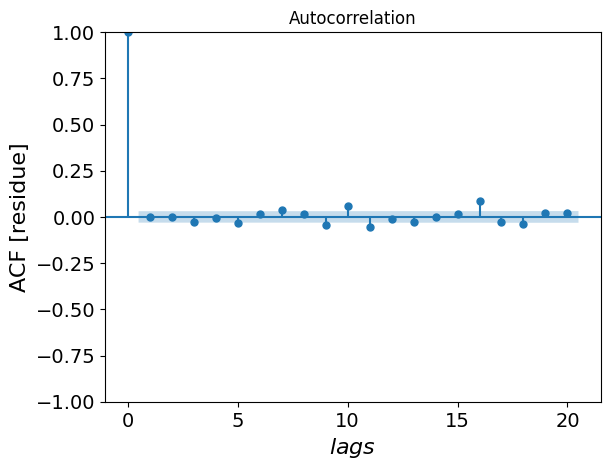

,lb_stat,lb_pvalue
0,60.288544,NaN
1,4.665472,NaN
2,11.487730,NaN
3,13.917983,1.909626e-04
4,13.996292,9.135741e-04
5,18.265286,3.877682e-04
6,19.080115,7.579642e-04
7,25.237421,1.253688e-04
8,25.699910,2.531980e-04
9,33.895054,1.802120e-05


In [12]:
n = 5 #varie from 0 to 5 to see differents models
p,q = AIC.model[n]

e  = M[p,q].resid

#Let us plot the ACF. If the model is correct we should expect something uncorrelated.
sm.graphics.tsa.plot_acf(e, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()


acorr_ljungbox(r,lags=range(p+q+10),model_df=p+q,return_df=True)

For all model the Ljung-Box test indicate underfitting, p-values are very low for every lags.

### Question 9) 

If we had to chose we would select (3,4) because his delta AIC is below 2 and his parameters are significants on the opposite of every other models we have considered.

### Question 10)

In [13]:
fit = arch_model(252*r, vol='GARCH',p= 1,q= 1).fit()



Iteration:      1,   Func. Count:      6,   Neg. LLF: 130106.53732246433
Iteration:      2,   Func. Count:     14,   Neg. LLF: 13706.42896191408
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1739479562.9451666
Iteration:      4,   Func. Count:     26,   Neg. LLF: 390686136.1257528
Iteration:      5,   Func. Count:     32,   Neg. LLF: 14143.08603326309
Iteration:      6,   Func. Count:     38,   Neg. LLF: 11734.408186042496
Iteration:      7,   Func. Count:     44,   Neg. LLF: 17628.393234279458
Iteration:      8,   Func. Count:     50,   Neg. LLF: 11704.50319036761
Iteration:      9,   Func. Count:     56,   Neg. LLF: 11652.803150883808
Iteration:     10,   Func. Count:     62,   Neg. LLF: 11708.040084898761
Iteration:     11,   Func. Count:     68,   Neg. LLF: 11644.383328655382
Iteration:     12,   Func. Count:     73,   Neg. LLF: 11644.347917927464
Iteration:     13,   Func. Count:     78,   Neg. LLF: 11644.348318551594
Iteration:     14,   Func. Count:     84,   Neg. LLF: 1

In [14]:
fit.aic

23296.68404602943

### Question 11) 

It is not correct to compare AIC of ARMA(p,q) and GARCH(1,1) one is -17143 and the other is 23296. AIC is made to comprare same moddel with a different degree of liberty.

### Question 12)

In [15]:
# Forecast of  2000 time step analytically

forecast = fit.forecast(horizon=2000,method='analytic',reindex=False)

###  Question 13)

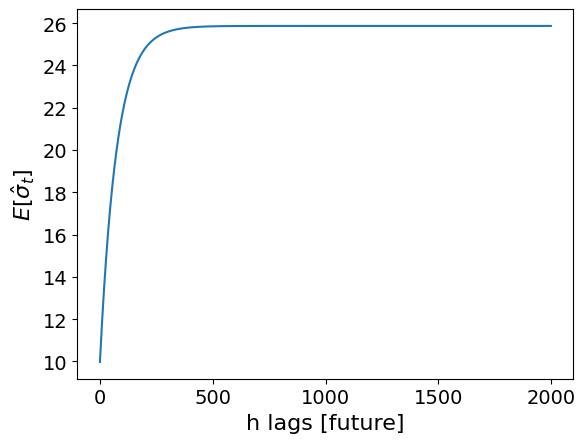

In [16]:
plt.plot( forecast.variance.iloc[-1].values )

plt.xlabel('h lags [future]',fontsize=16)
plt.ylabel(r'$E[\hat{\sigma}_t]$',fontsize=16)
plt.tick_params(labelsize=14)

We see that conditional variance converge to a certain value.